<a href="https://colab.research.google.com/github/brijeshksingh/AIML_Colab_repo/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('/content/sample_data/Data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df = df.iloc[:,2:]
df.sample(5)
#df.size

,Age,EstimatedSalary,Purchased
316,54,104000,1
150,26,15000,0
119,41,59000,0
259,45,131000,1
145,24,89000,0


Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'],test_size=0.3, random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)
#

In [13]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [16]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [17]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of scaling

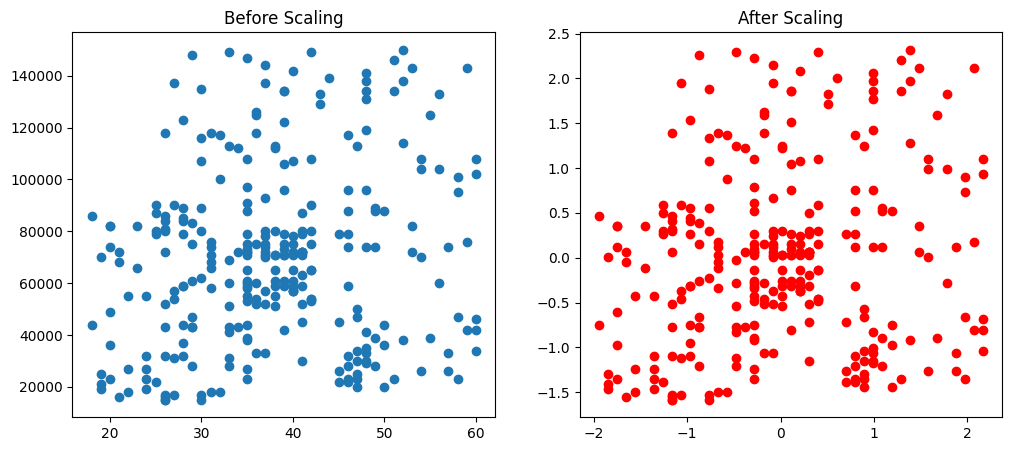

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

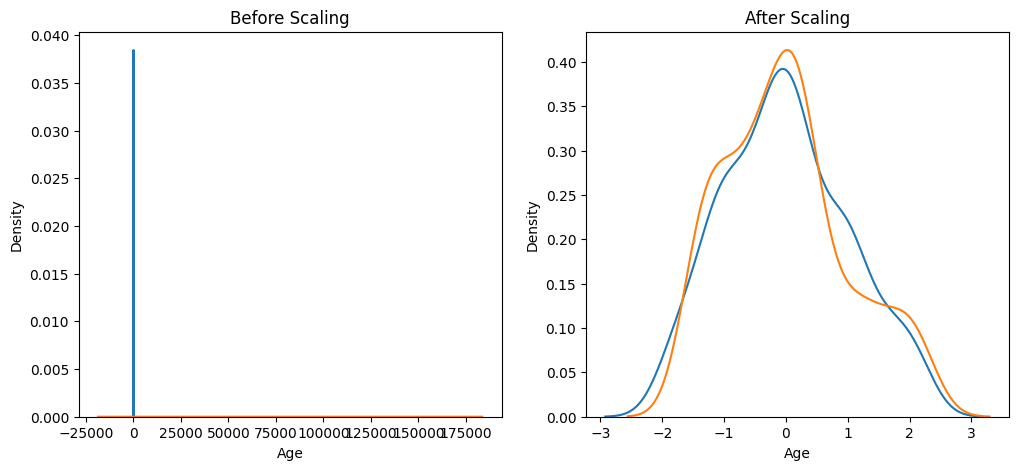

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()
#

Comparison of distributions

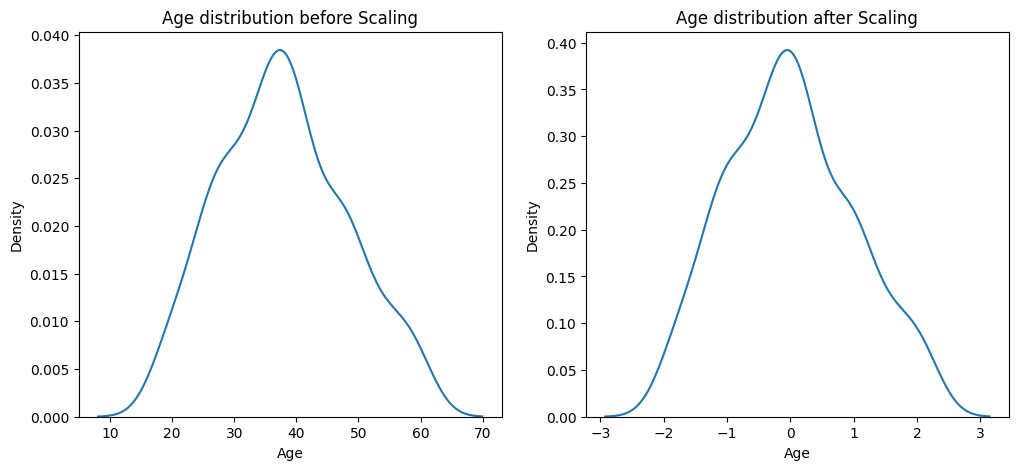

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age distribution before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
#sns.distplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Age distribution after Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
#sns.distplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

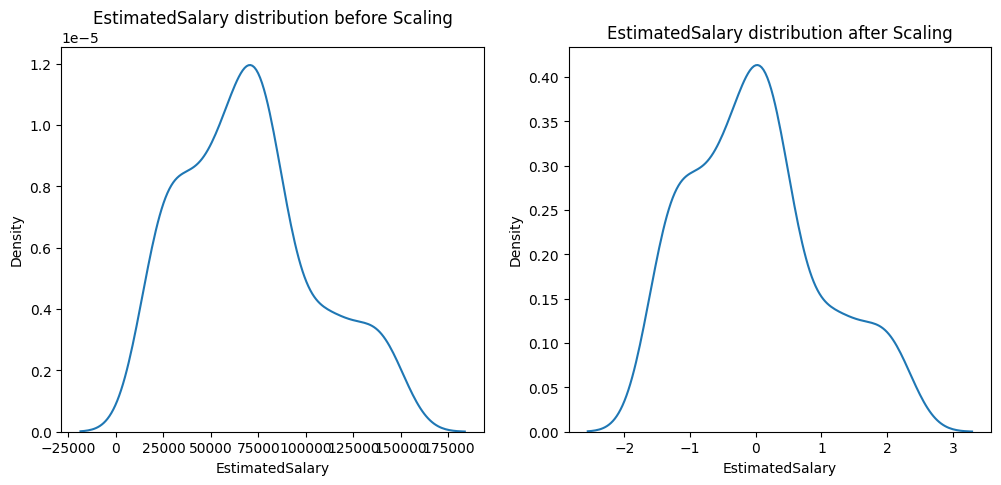

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('EstimatedSalary distribution before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('EstimatedSalary distribution after Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()
#

Why scaling is important

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)


LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [30]:
print("actual", accuracy_score(y_test, y_pred))
print("scaled", accuracy_score(y_test, y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [32]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [34]:
print("actual", accuracy_score(y_test, y_pred))
print("scaled", accuracy_score(y_test, y_pred_scaled))

actual 0.875
scaled 0.8666666666666667


In [36]:
df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[400 rows x 0 columns]>

In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of outliers